In [101]:
import pandas as pd
#load data from csv
df_shareholder_relations = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_relations_2021_duplicate_rows (1).csv')

df_startups = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/startups_rows_raw.csv')
df_shareholders = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholders_duplicate_rows_raw.csv') 

df_startups

,startup_id,created_at,startup_name,shareholder_json,list_mds,number_shareholders,number_angels,startup_industry,startup_purpose,link_shareholder_file_2021,...,startup_website,startup_linkedin,startup_industry_mapped,azure_json,error,link_structured_content_file_current,azure_json_2021,shareholder_json_2021,startup_region,changed_shareholder_structure
0,13807,2024-01-17 10:13:02.185889+00,EDSC GmbH & Co. KG,NaN,NaN,0,NaN,Hardware,NaN,NaN,...,https://www.edsc.de,NaN,technology_digital_services,NaN,multiple results found,NaN,NaN,NaN,ba_wue,NaN
1,1195,2024-01-17 10:12:51.416275+00,Building Information Cloud GLWG GmbH,"{""shareholders"":[{""shareholder_name"":""Herr Uni...","{""name"":{""0"":1195,""1"":1195,""2"":1195},""total_MD...",4,NaN,Bauwesen,"{""gegenstand"": ""die Entwicklung und der Vertri...",Building Information Cloud GLWG GmbH_Nrnberg_H...,...,https://buildinginformationcloud.de/,https://www.linkedin.com/company/building-info...,energy_environment_infrastructure,"{""Gesellschafter (Name, Geburtsdatum, Anschrif...",NaN,Building Information Cloud GLWG GmbH_Nrnberg_H...,"{""Lfd. Nummern der Gesch\u00e4ftsanteile"":{""0""...","{""shareholders"":[{""shareholder_name"":""Herr Uni...",bayern,yes
2,10856,2024-01-17 10:12:59.864646+00,Cosuno Ventures GmbH,"{""shareholders"":[{""shareholder_name"":""Laubach ...","{""name"":{""0"":10856,""1"":10856,""2"":10856},""akten...",19,NaN,Bauwesen,"{""gegenstand"": ""der Betrieb von Internet-Platt...",Cosuno Ventures GmbH_Berlin Charlottenburg_HRB...,...,https://www.cosuno.de/,https://www.linkedin.com/company/cosuno/,energy_environment_infrastructure,"{""Name, Vorname (bei jur. Personen: Firma)"":{""...",NaN,Cosuno Ventures GmbH_Berlin Charlottenburg_HRB...,"{""Lfd. Nr. des Gesch\u00e4ftsanteils \/ consec...","{""shareholders"":[{""shareholder_name"":""Laubach ...",berlin,yes
3,14177,2024-03-07 16:06:31.684443+00,WoodenValley UG (haftungsbeschränkt),NaN,"{""name"":{""0"":14177,""1"":14177,""2"":14177},""total...",4,NaN,Bauwesen,"{""gegenstand"": ""Die F\u00f6rderung des Natursc...",WoodenValley gGmbH_Stuttgart_HRB 782249/Liste ...,...,https://www.woodenvalley.de/,NaN,energy_environment_infrastructure,NaN,NaN,WoodenValley gGmbH_Stuttgart_HRB 782249/SI-Woo...,"{""Gesellschafter\nGesellschafter \/Geburtsdatu...","[{""birthdate"":""1980-05-12"",""register_id"":null,...",ba_wue,yes
4,4790,2024-01-17 10:12:54.79246+00,SooMore GmbH,"{""shareholders"":[{""shareholder_name"":""Lejla Se...","{""name"":{""0"":4790,""1"":4790},""total_MDs"":{""0"":2...",0,NaN,Bauwesen,"{""gegenstand"": ""Entwicklung und Betrieb eines ...",NaN,...,http://soomore.de/,NaN,energy_environment_infrastructure,"{""Nr."":{""0"":""1 bis 12.500"",""1"":""12.501 bis 25....",NaN,SooMore GmbH_Mnchen_HRB 273985/SI-SooMore GmbH...,NaN,NaN,bayern,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14111,17106,2024-03-07 16:06:34.455994+00,Yolawo UG (haftungsbeschränkt),NaN,NaN,1,NaN,Sport,NaN,Yolawo GmbH_Freiburg_HRB 716809/Liste der Gese...,...,https://yolawo.de,NaN,healthcare,NaN,NaN,Yolawo GmbH_Freiburg_HRB 716809/SI-Yolawo GmbH...,NaN,"[{""birthdate"":null,""register_id"":""HRB 268779"",...",ba_wue,yes
14112,9341,2024-01-17 10:12:58.304802+00,Pattarina GmbH,NaN,"{""name"":{""0"":9341,""1"":9341},""aktenzeichen"":{""0...",1,NaN,Software,"{""gegenstand"": ""ist die Entwicklung, der Betri...",Pattarina GmbH_Cottbus_HRB 13839/Liste der Ges...,...,https://www.pattarina.de/,NaN,technology_digital_services,NaN,NaN,Pattarina GmbH_Cottbus_HRB 13839/SI-Pattarina ...,NaN,"[{""birthdate"":null,""register_id"":""HRB 268779"",...",germany_east,no
14113,12176,2024-01-17 10:13:01.504395+00,The Car Guys GmbH,NaN,"{""name"":{""0"":12176},""total_MDs"":{""0"":1},""gegen...",1,NaN,Mobilität,"{""gegenstand"": ""Vermietung von Kraftfahrzeugen...",The Car Guys GmbH_Dresden_HRB 37118/Liste der ...,...,https://thecarguys.de,NaN,energy_environment_infrastructure,NaN,NaN,The Car Guys GmbH_Dresden_HRB 37118/SI-The Car

## Create Investment relations Dataframe

Entails all relations between an investor and a startup/company

![image.png](attachment:image.png)



In [102]:
#Taking the df_shareholder_relations and remove duplicate rows
print(f"Length before dropping duplicates {len(df_shareholder_relations)}")
df_shareholder_relations = df_shareholder_relations.drop_duplicates()
print(f"Length after dropping duplicates{len(df_shareholder_relations)}")


Length before dropping duplicates 35685
Length after dropping duplicates35685


In [103]:
#find shareholder relations where shareholder_name is Thomas Werner
df_shareholder_relations[df_shareholder_relations['shareholder_name'] == 'Andreas Viereck']

,relation_id,created_at,shareholder_name,shareholder_location,birthdate,register_id,register_court,percentage_of_total_shares,shareholder_type,startup_name,shareholder_country,openai_result,startup_id,register_mapping,shareholder_name_mapped
8812,35421,2024-03-09 11:13:32.236618+00,Andreas Viereck,Wiesbaden,1968-09-06,NaN,NaN,0.1,NaN,Digooh Media GmbH,Germany,NaN,8625,NaN,NaN


In [104]:
#Taking df_shareholder_relations and remove rows with missing shareholder_name
print(f"Length before dropping missing values {len(df_shareholder_relations)}")
df_shareholder_relations = df_shareholder_relations.dropna(subset=['shareholder_name'])
print(f"Length after dropping missing values {len(df_shareholder_relations)}")


Length before dropping missing values 35685
Length after dropping missing values 34650


In [105]:
#find shareholder relations where shareholder_name is Thomas Werner
df_shareholder_relations[df_shareholder_relations['shareholder_name'] == 'Andreas Viereck']

,relation_id,created_at,shareholder_name,shareholder_location,birthdate,register_id,register_court,percentage_of_total_shares,shareholder_type,startup_name,shareholder_country,openai_result,startup_id,register_mapping,shareholder_name_mapped
8812,35421,2024-03-09 11:13:32.236618+00,Andreas Viereck,Wiesbaden,1968-09-06,NaN,NaN,0.1,NaN,Digooh Media GmbH,Germany,NaN,8625,NaN,NaN


In [106]:
#Take df_shareholder_relations and remove rows with shareholder_name "Summe" or "Gesamt"
print(f"Length before dropping Gesamt and Summe {len(df_shareholder_relations)}")
df_shareholder_relations = df_shareholder_relations[~df_shareholder_relations['shareholder_name'].str.contains('Summe|Gesamt|Stammkapital|1|2|3|25.000|STAMMKAPITAL|STAMMKAPTAL IN EURO')]
print(f"Length after dropping Gesamt and Summe {len(df_shareholder_relations)}")


Length before dropping Gesamt and Summe 34650
Length after dropping Gesamt and Summe 31005


In [107]:
#find shareholder relations where shareholder_name is Thomas Werner
df_shareholder_relations[df_shareholder_relations['shareholder_name'] == 'Andreas Viereck']

,relation_id,created_at,shareholder_name,shareholder_location,birthdate,register_id,register_court,percentage_of_total_shares,shareholder_type,startup_name,shareholder_country,openai_result,startup_id,register_mapping,shareholder_name_mapped
8812,35421,2024-03-09 11:13:32.236618+00,Andreas Viereck,Wiesbaden,1968-09-06,NaN,NaN,0.1,NaN,Digooh Media GmbH,Germany,NaN,8625,NaN,NaN


In [108]:
# #Return all rows ehre shareholder_name is TestInc;AG München, HRB 268779
# df_shareholder_relations[df_shareholder_relations['shareholder_name'] == 'TestInc;AG München, HRB 26877|TestInc;|TestInc|TestInc;AG|TestInc']

# #Return all startups ids where shareholder_name is TestInc;AG München, HRB 268779
# ids=df_shareholder_relations[df_shareholder_relations['shareholder_name'] == 'TestInc;AG München, HRB 26877|TestInc;|TestInc|TestInc;AG|TestInc']['startup_id']


#Return all rows with the startup_ID 
#remove all rows with the startup_id
df_shareholder_relations = df_shareholder_relations[~df_shareholder_relations['shareholder_name'].str.contains('TestInc;AG München, HRB 26877|TestInc;|TestInc|TestInc;AG|TestInc|H\u00f6he EUR":{"0":""}|(name of shareholder)|AG Gütersloh|AG Offenbach am Main|AG Stuttgart|FREIBLEIBEND|FREIBLEIBEND / INTENTIONALLY LEFT BLANK')]

len(df_shareholder_relations)

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_44120/4180297427.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_shareholder_relations = df_shareholder_relations[~df_shareholder_relations['shareholder_name'].str.contains('TestInc;AG München, HRB 26877|TestInc;|TestInc|TestInc;AG|TestInc|H\u00f6he EUR":{"0":""}|(name of shareholder)|AG Gütersloh|AG Offenbach am Main|AG Stuttgart|FREIBLEIBEND|FREIBLEIBEND / INTENTIONALLY LEFT BLANK')]


30908

In [109]:
#find shareholder relations where shareholder_name is Thomas Werner
df_shareholder_relations[df_shareholder_relations['shareholder_name'] == 'Andreas Viereck']

,relation_id,created_at,shareholder_name,shareholder_location,birthdate,register_id,register_court,percentage_of_total_shares,shareholder_type,startup_name,shareholder_country,openai_result,startup_id,register_mapping,shareholder_name_mapped
8812,35421,2024-03-09 11:13:32.236618+00,Andreas Viereck,Wiesbaden,1968-09-06,NaN,NaN,0.1,NaN,Digooh Media GmbH,Germany,NaN,8625,NaN,NaN


In [110]:
#remove when shareholder_name and shareholder_id are duplicate
print(f"Length before dropping duplicates {len(df_shareholder_relations)}")
df_shareholder_relations = df_shareholder_relations.drop_duplicates(subset=['shareholder_name', 'startup_id'])
print(f"Length after dropping duplicates {len(df_shareholder_relations)}")

Length before dropping duplicates 30908
Length after dropping duplicates 29546


In [111]:
#find shareholder relations where shareholder_name is Thomas Werner
df_shareholder_relations[df_shareholder_relations['shareholder_name'] == 'Andreas Viereck']

,relation_id,created_at,shareholder_name,shareholder_location,birthdate,register_id,register_court,percentage_of_total_shares,shareholder_type,startup_name,shareholder_country,openai_result,startup_id,register_mapping,shareholder_name_mapped
8812,35421,2024-03-09 11:13:32.236618+00,Andreas Viereck,Wiesbaden,1968-09-06,NaN,NaN,0.1,NaN,Digooh Media GmbH,Germany,NaN,8625,NaN,NaN


In [112]:
#remove substring from shareholder_name and shareholder_name_mapped
df_shareholder_relations['shareholder_name'] = df_shareholder_relations['shareholder_name'].str.replace('Firma |Frau |Herr |Firma', '')  
df_shareholder_relations['shareholder_name_mapped'] = df_shareholder_relations['shareholder_name_mapped'].str.replace('Firma |Frau |Herr |Firma', '')


/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_44120/1500586759.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_shareholder_relations['shareholder_name'] = df_shareholder_relations['shareholder_name'].str.replace('Firma |Frau |Herr |Firma', '')
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_44120/1500586759.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_shareholder_relations['shareholder_name_mapped'] = df_shareholder_relations['shareholder_name_mapped'].str.replace('Firma |Frau |Herr |Firma', '')


In [113]:
#find shareholder relations where shareholder_name is Thomas Werner
df_shareholder_relations[df_shareholder_relations['shareholder_name'] == 'Andreas Viereck']

,relation_id,created_at,shareholder_name,shareholder_location,birthdate,register_id,register_court,percentage_of_total_shares,shareholder_type,startup_name,shareholder_country,openai_result,startup_id,register_mapping,shareholder_name_mapped
8812,35421,2024-03-09 11:13:32.236618+00,Andreas Viereck,Wiesbaden,1968-09-06,NaN,NaN,0.1,NaN,Digooh Media GmbH,Germany,NaN,8625,NaN,NaN


In [114]:
print(f"Length before dropping duplicates {len(df_shareholder_relations)}")
#drop where shareholder_name_mapped and startup_name are the same
df_shareholder_relations = df_shareholder_relations[~(df_shareholder_relations['shareholder_name_mapped'] == df_shareholder_relations['startup_name'])]
print(f"Length after dropping duplicates {len(df_shareholder_relations)}")

Length before dropping duplicates 29546
Length after dropping duplicates 29439


In [115]:
#find shareholder relations where shareholder_name is Thomas Werner
df_shareholder_relations[df_shareholder_relations['shareholder_name'] == 'Andreas Viereck']

,relation_id,created_at,shareholder_name,shareholder_location,birthdate,register_id,register_court,percentage_of_total_shares,shareholder_type,startup_name,shareholder_country,openai_result,startup_id,register_mapping,shareholder_name_mapped
8812,35421,2024-03-09 11:13:32.236618+00,Andreas Viereck,Wiesbaden,1968-09-06,NaN,NaN,0.1,NaN,Digooh Media GmbH,Germany,NaN,8625,NaN,NaN


In [116]:
#find shareholder relations where shareholder_name is Thomas Werner
df_shareholder_relations[df_shareholder_relations['shareholder_name'] == 'Andreas Viereck']

,relation_id,created_at,shareholder_name,shareholder_location,birthdate,register_id,register_court,percentage_of_total_shares,shareholder_type,startup_name,shareholder_country,openai_result,startup_id,register_mapping,shareholder_name_mapped
8812,35421,2024-03-09 11:13:32.236618+00,Andreas Viereck,Wiesbaden,1968-09-06,NaN,NaN,0.1,NaN,Digooh Media GmbH,Germany,NaN,8625,NaN,NaN


In [117]:
# make column register_mapping tto type int where it is not NaN
df_shareholder_relations['register_mapping'] = df_shareholder_relations['register_mapping'].fillna(0)
df_shareholder_relations['register_mapping'] = df_shareholder_relations['register_mapping'].astype(int)






In [118]:
#add a new column shareholder_type to df_shareholder_relations
df_shareholder_relations['shareholder_type'] = ""
#get the shareholder type for each shareholder_name from shareholders
for index, row in df_shareholder_relations.iterrows():
    shareholder_name = row['shareholder_name']
    shareholder_type = df_shareholders[df_shareholders['shareholder_name'] == shareholder_name]['shareholder_type']
    if len(shareholder_type) > 0:
        df_shareholder_relations.at[index, 'shareholder_type'] = shareholder_type.values[0]

df_shareholder_relations.head()

,relation_id,created_at,shareholder_name,shareholder_location,birthdate,register_id,register_court,percentage_of_total_shares,shareholder_type,startup_name,shareholder_country,openai_result,startup_id,register_mapping,shareholder_name_mapped
6,553,2024-02-29 16:45:49.495019+00,Robotics Consulting GmbH,Fürstenfeldbruck,NaN,HRB 263605,München,0.2600,angel,COBOWORX GmbH,Germany,NaN,7292,136,Robotics Consulting GmbH
7,555,2024-02-29 16:46:29.925792+00,Nero Holding GmbH,Frankfurt am Main,NaN,HRB 124717,Frankfurt am Main,100.0000,NaN,MA Nero GmbH,Germany,NaN,11896,281,Nero Holding GmbH
8,2215,2024-02-29 17:01:40.470034+00,Venture Stars Pooling UG (haftungsbeschränkt),München,NaN,HRB 196930,München,0.3379,NaN,Finoa GmbH,Germany,NaN,8184,136,NaN
9,974,2024-02-29 16:49:33.502778+00,AL Holding UG (haftungsbeschränkt),Meerbusch,NaN,HRB 19211,Neuss,NaN,,Yard GmbH,Germany,NaN,12847,442,NaN
10,1547,2024-02-29 16:55:35.338603+00,CK Ventures GmbH,Leipzig,NaN,HR B 32433,Leipzig,4.0000,angel,CROWDBUILDING Technology GmbH,Germany,NaN,5043,649,NaN


In [119]:
len(df_shareholder_relations)

29439

In [122]:
#get all where shareholder_name_mapped is null
df_shareholder_relations[df_shareholder_relations['shareholder_name_mapped'].isnull()]

#where shareholder_name_mapped is null make it equal to shareholder_name
df_shareholder_relations['shareholder_name_mapped'] = df_shareholder_relations['shareholder_name_mapped'].fillna(df_shareholder_relations['shareholder_name'])

In [ ]:
#save as csv
df_shareholder_relations.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_relations_cleaned.csv', index=False)


In [123]:
import pandas as pd

In [124]:
#read df shareholder relation from csv
# df_shareholder_relations = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_relations_2021_duplicate_duplicate_rows.csv')

#Get a  list of a lle shareholder_names and how often they occur
shareholder_name_counts = df_shareholder_relations['shareholder_name_mapped'].value_counts()
print(shareholder_name_counts)
shareholder_name_counts.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_name_counts.csv', sep=';', encoding='utf-8')
#get only the shareholder_names as df and safe as csv
shareholder_names = df_shareholder_relations['shareholder_name_mapped']





# #safe only shareholder_names as csv with semicolon delimiter, encoding so it can be read by excel
# shareholder_names = df_shareholder_relations['shareholder_name']
# shareholder_names.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_names.csv', sep=';', encoding='utf-8')


High Tech Gründerfonds GmbH & Co. KG                                                   64
Atlantic Food Labs Fund I GmbH & Co. KG                                                56
Tiny Fund II, a series of Continental Tiny Supercomputer Investment Companies, L.P.    34
HV Growth Fund GmbH & Co. KG                                                           33
NRW.BANK                                                                               29
                                                                                       ..
J Ventures UG (haftungsbeschränkt)                                                      1
Gain UP UG (haftungsbeschränkt)                                                         1
LAMA Beteiligungs GmbH                                                                  1
INBATEK GMBH in Neuwied                                                                 1
Heinrich Keiho Menk-haus                                                                1
Name: shar

In [125]:
# # #safe only shareholder_names as csv with semicolon delimiter, encoding so it can be read by excel
# # shareholder_names = df_shareholder_relations['shareholder_name']
# # shareholder_names.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_names.csv', sep=';', encoding='utf-8')
# # print(shareholder_names)

# #read in csv with shareholder_name map
# df_shareholder_name_map = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_name_map_rows.csv')


In [126]:
# #get subset of shareholder_names that are not in shareholder_name_map
# shareholder_names_not_mapped = shareholder_names[~shareholder_names.isin(df_shareholder_name_map['shareholder_name'])]
# print(shareholder_names_not_mapped)
# #add columns to shareholder_names_not_mapped "shareholder_name_mapped"
# shareholder_names_not_mapped = pd.DataFrame(shareholder_names_not_mapped)
# shareholder_names_not_mapped['shareholder_name_map'] = ""

# #safe only shareholder_names as csv with semicolon delimiter
# shareholder_names_not_mapped.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_names_not_mapped.csv', sep=';', encoding='utf-8')


In [127]:
# df_shareholder_name_map
# #safe shareholder_name_map as csv

# # #unique df of shareholders
# # print(len(shareholder_names))
# # unique_shareholder_names = shareholder_names.drop_duplicates()
# # # print(len(unique_shareholder_names))
# # print(unique_shareholder_names)
# # unique_shareholder_names.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholder_names.csv', sep=';', encoding='utf-8')

In [128]:
#Add all unique shareholder names from shareholder_relations to df_shareholders 
shareholder_names = df_shareholder_relations['shareholder_name_mapped'].unique()
df_shareholders = pd.DataFrame(shareholder_names, columns=['shareholder_name_mapped'])

df_shareholders.head()

#count the number of investements per shareholder in shareholder relations and add it to number_of_investments in df_shareholders
number_of_investments = df_shareholder_relations['shareholder_name_mapped'].value_counts()
df_shareholders['number_of_investments'] = df_shareholders['shareholder_name_mapped'].map(number_of_investments)
df_shareholders.sort_values(by='number_of_investments', ascending=False)


,shareholder_name_mapped,number_of_investments
80,High Tech Gründerfonds GmbH & Co. KG,64
1921,Atlantic Food Labs Fund I GmbH & Co. KG,56
4764,"Tiny Fund II, a series of Continental Tiny Sup...",34
63,HV Growth Fund GmbH & Co. KG,33
107,NRW.BANK,29
...,...,...
9503,J Ventures UG (haftungsbeschränkt),1
9502,Gain UP UG (haftungsbeschränkt),1
9501,LAMA Beteiligungs GmbH,1
9500,INBATEK GMBH in Neuwied,1


In [129]:
unique_shareholder_relations = df_shareholder_relations.drop_duplicates(subset='shareholder_name_mapped', keep='first')


#Create a new column in df_shareholders called registry number  and one called registry court and map the value from reigstry number and registry court from df_shareholder_relations

df_shareholders['register_id'] = df_shareholders['shareholder_name_mapped'].map(unique_shareholder_relations.set_index('shareholder_name_mapped')['register_id'])
df_shareholders['register_court'] = df_shareholders['shareholder_name_mapped'].map(unique_shareholder_relations.set_index('shareholder_name_mapped')['register_court'])

#add birthdate
df_shareholders['birthdate'] = df_shareholders['shareholder_name_mapped'].map(unique_shareholder_relations.set_index('shareholder_name_mapped')['birthdate'])

#add shareholder_location
df_shareholders['shareholder_location'] = df_shareholders['shareholder_name_mapped'].map(unique_shareholder_relations.set_index('shareholder_name_mapped')['shareholder_location'])

df_shareholders.sort_values(by='number_of_investments', ascending=False)


,shareholder_name_mapped,number_of_investments,register_id,register_court,birthdate,shareholder_location
80,High Tech Gründerfonds GmbH & Co. KG,64,HRA 8800,Bonn,NaN,Bonn
1921,Atlantic Food Labs Fund I GmbH & Co. KG,56,HRA 58995,Berlin,NaN,Berlin
4764,"Tiny Fund II, a series of Continental Tiny Sup...",34,Nr. 6919407,Secretary of State of the State of Delaware,NaN,"Seattle, Washington"
63,HV Growth Fund GmbH & Co. KG,33,HRA 122498,Hamburg,NaN,Hamburg
107,NRW.BANK,29,HRA 15277,Düsseldorf,NaN,Düsseldorf/Münster
...,...,...,...,...,...,...
9503,J Ventures UG (haftungsbeschränkt),1,HRB-Nr. 258613,München,NaN,München
9502,Gain UP UG (haftungsbeschränkt),1,HRB 32734 P,Potsdam,NaN,Zossen
9501,LAMA Beteiligungs GmbH,1,HRB 11996 CB,Cottbus,NaN,Wildau
9500,INBATEK GMBH in Neuwied,1,HRB 26186,Montabaur,NaN,Neuwied


In [130]:
# #for each startup id calculate the total participation
# total_participation = df_shareholder_relations.groupby('startup_id')['percentage_of_total_shares'].sum()
# #sort by total participation descending
# total_participation = total_participation.sort_values(ascending=False)
# total_participation
# #get subset where it is exactly 100%    
# total_participation_100 = total_participation[total_participation == 100]
# len(total_participation_100)

# # get subset of df_shareholder_relations where the startup_id is in total_participation_100
# df_shareholder_relations_100 = df_shareholder_relations[df_shareholder_relations['startup_id'].isin(total_participation_100.index)]
# len(df_shareholder_relations_100)

In [131]:
# #calculate the total participation of each shareholder in all startups
# #calculate average total participation in percent for each shareholder from original df
# df_shareholders['total_participation'] = df_shareholders['shareholder_name_mapped'].apply(lambda x: df_shareholder_relations_100[df_shareholder_relations_100['shareholder_name_mapped'] == x]['percentage_of_total_shares'].sum()/df_shareholder_relations_100[df_shareholder_relations_100['shareholder_name_mapped']== x]['startup_name'].count())
# df_shareholders.sort_values(by='total_participation', ascending=False)

In [132]:
#map shareholder_location to df_shareholders
df_shareholders['shareholder_location'] = df_shareholders['shareholder_name_mapped'].map(unique_shareholder_relations.set_index('shareholder_name_mapped')['shareholder_location'])

In [133]:
#add empty columns to the df_shareholders: shareholder_purpose, link_structured_content_file, gender, firstname, lastname, list_mds, shareholder_type, register_mapping

df_shareholders['shareholder_purpose'] = ''
df_shareholders['link_structured_content_file_current'] = ''
df_shareholders['gender'] = ''
df_shareholders['firstname'] = ''
df_shareholders['lastname'] = ''
df_shareholders['list_mds'] = ''
df_shareholders['shareholder_type'] = ''
df_shareholders['register_mapping'] = ''
#drop NaN values in shareholder_names_mapped
df_shareholders = df_shareholders.dropna(subset=['shareholder_name_mapped'])
df_shareholders


,shareholder_name_mapped,number_of_investments,register_id,register_court,birthdate,shareholder_location,shareholder_purpose,link_structured_content_file_current,gender,firstname,lastname,list_mds,shareholder_type,register_mapping
0,Robotics Consulting GmbH,1,HRB 263605,München,NaN,Fürstenfeldbruck,,,,,,,,
1,Nero Holding GmbH,1,HRB 124717,Frankfurt am Main,NaN,Frankfurt am Main,,,,,,,,
2,Venture Stars Pooling UG (haftungsbeschränkt),1,HRB 196930,München,NaN,München,,,,,,,,
3,AL Holding UG (haftungsbeschränkt),1,HRB 19211,Neuss,NaN,Meerbusch,,,,,,,,
4,CK Ventures GmbH,2,HR B 32433,Leipzig,NaN,Leipzig,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26527,Fabian Haeckermann Godoy,1,NaN,NaN,1989-04-20,Berlin,,,,,,,,
26528,Paul Ortlepp,1,NaN,NaN,1995-06-08,Leipzig,,,,,,,,
26529,Thorsten Patzlaff,1,NaN,NaN,1979-07-03,49716 Meppen,,,,,,,,
26530,Sven Günzel,1,NaN,NaN,1976-08-02,Karlsbad,,,,,,,,


In [134]:
#Drop index column
df_shareholders = df_shareholders.reset_index(drop=True)

#export df_shareholders to csv

df_shareholders.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholders.csv', sep=';', encoding='utf-8')

In [135]:
import requests
from pdf2image import convert_from_bytes
import pytesseract
import io
from urllib.parse import unquote
import tiktoken
from typing import Tuple
import urllib.parse
import pandas as pd

## Create a Dataframe with all unique companies that have shareholders

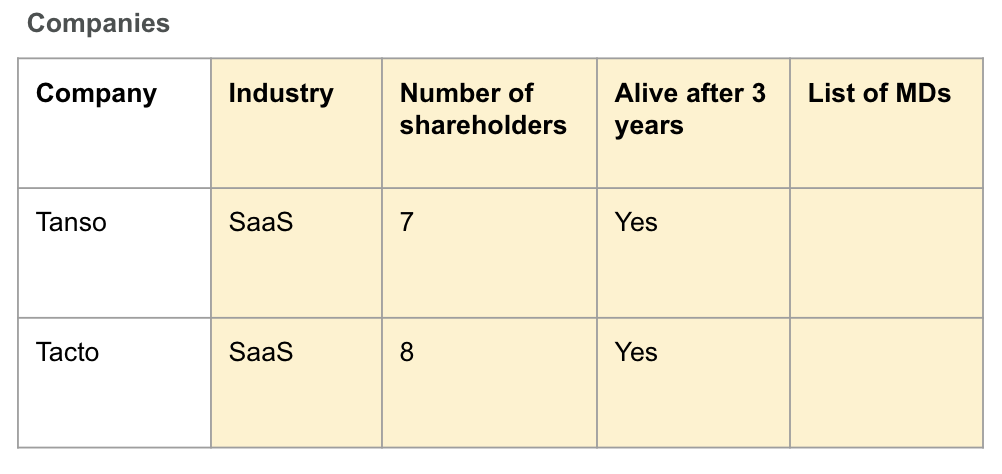


In [136]:
#create a df with one column called startup id and one called number_shareholders and include zeros for all startups that have no shareholders

number_shareholders = df_shareholder_relations['startup_id'].value_counts()
number_shareholders = number_shareholders.reset_index()
number_shareholders.columns = ['startup_id', 'number_shareholders']
print(number_shareholders)
number_shareholders =pd.DataFrame(number_shareholders)
print(number_shareholders)
df_startups['startup_id'] = df_startups['startup_id'].astype('str')
number_shareholders['startup_id'] = number_shareholders['startup_id'].astype('str')

df_startups_updated = pd.merge(df_startups, number_shareholders, on='startup_id', how='left')

#drop number_shareholders_x and rename number_shareholders_y to number_shareholders
df_startups_updated = df_startups_updated.drop(columns=['number_shareholders_x'])
df_startups_updated = df_startups_updated.rename(columns={'number_shareholders_y': 'number_shareholders'})
# df_startups_updated['number_shareholders'] = df_startups_updated['number_shareholders'].fillna(0)
df_startups_updated
#update number_shareholders in df_startups

      startup_id  number_shareholders
0           2404                   41
1           2186                   40
2           8625                   37
3          12162                   36
4           8918                   36
...          ...                  ...
8889        8244                    1
8890       10000                    1
8891       13364                    1
8892        5208                    1
8893        4534                    1

[8894 rows x 2 columns]
      startup_id  number_shareholders
0           2404                   41
1           2186                   40
2           8625                   37
3          12162                   36
4           8918                   36
...          ...                  ...
8889        8244                    1
8890       10000                    1
8891       13364                    1
8892        5208                    1
8893        4534                    1

[8894 rows x 2 columns]


,startup_id,created_at,startup_name,shareholder_json,list_mds,number_angels,startup_industry,startup_purpose,link_shareholder_file_2021,link_si_file_current,...,startup_linkedin,startup_industry_mapped,azure_json,error,link_structured_content_file_current,azure_json_2021,shareholder_json_2021,startup_region,changed_shareholder_structure,number_shareholders
0,13807,2024-01-17 10:13:02.185889+00,EDSC GmbH & Co. KG,NaN,NaN,NaN,Hardware,NaN,NaN,NaN,...,NaN,technology_digital_services,NaN,multiple results found,NaN,NaN,NaN,ba_wue,NaN,NaN
1,1195,2024-01-17 10:12:51.416275+00,Building Information Cloud GLWG GmbH,"{""shareholders"":[{""shareholder_name"":""Herr Uni...","{""name"":{""0"":1195,""1"":1195,""2"":1195},""total_MD...",NaN,Bauwesen,"{""gegenstand"": ""die Entwicklung und der Vertri...",Building Information Cloud GLWG GmbH_Nrnberg_H...,Building Information Cloud GLWG GmbH_Nrnberg_H...,...,https://www.linkedin.com/company/building-info...,energy_environment_infrastructure,"{""Gesellschafter (Name, Geburtsdatum, Anschrif...",NaN,Building Information Cloud GLWG GmbH_Nrnberg_H...,"{""Lfd. Nummern der Gesch\u00e4ftsanteile"":{""0""...","{""shareholders"":[{""shareholder_name"":""Herr Uni...",bayern,yes,4.0
2,10856,2024-01-17 10:12:59.864646+00,Cosuno Ventures GmbH,"{""shareholders"":[{""shareholder_name"":""Laubach ...","{""name"":{""0"":10856,""1"":10856,""2"":10856},""akten...",NaN,Bauwesen,"{""gegenstand"": ""der Betrieb von Internet-Platt...",Cosuno Ventures GmbH_Berlin Charlottenburg_HRB...,Cosuno Ventures GmbH_Berlin Charlottenburg_HRB...,...,https://www.linkedin.com/company/cosuno/,energy_environment_infrastructure,"{""Name, Vorname (bei jur. Personen: Firma)"":{""...",NaN,Cosuno Ventures GmbH_Berlin Charlottenburg_HRB...,"{""Lfd. Nr. des Gesch\u00e4ftsanteils \/ consec...","{""shareholders"":[{""shareholder_name"":""Laubach ...",berlin,yes,18.0
3,14177,2024-03-07 16:06:31.684443+00,WoodenValley UG (haftungsbeschränkt),NaN,"{""name"":{""0"":14177,""1"":14177,""2"":14177},""total...",NaN,Bauwesen,"{""gegenstand"": ""Die F\u00f6rderung des Natursc...",WoodenValley gGmbH_Stuttgart_HRB 782249/Liste ...,WoodenValley gGmbH_Stuttgart_HRB 782249/Liste ...,...,NaN,energy_environment_infrastructure,NaN,NaN,WoodenValley gGmbH_Stuttgart_HRB 782249/SI-Woo...,"{""Gesellschafter\nGesellschafter \/Geburtsdatu...","[{""birthdate"":""1980-05-12"",""register_id"":null,...",ba_wue,yes,2.0
4,4790,2024-01-17 10:12:54.79246+00,SooMore GmbH,"{""shareholders"":[{""shareholder_name"":""Lejla Se...","{""name"":{""0"":4790,""1"":4790},""total_MDs"":{""0"":2...",NaN,Bauwesen,"{""gegenstand"": ""Entwicklung und Betrieb eines ...",NaN,SooMore GmbH_Mnchen_HRB 273985/Liste der Gesel...,...,NaN,energy_environment_infrastructure,"{""Nr."":{""0"":""1 bis 12.500"",""1"":""12.501 bis 25....",NaN,SooMore GmbH_Mnchen_HRB 273985/SI-SooMore GmbH...,NaN,NaN,bayern,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14111,17106,2024-03-07 16:06:34.455994+00,Yolawo UG (haftungsbeschränkt),NaN,NaN,NaN,Sport,NaN,Yolawo GmbH_Freiburg_HRB 716809/Liste der Gese...,Yolawo GmbH_Freiburg_HRB 716809/Liste der Gese...,...,NaN,healthcare,NaN,NaN,Yolawo GmbH_Freiburg_HRB 716809/SI-Yolawo GmbH...,NaN,"[{""birthdate"":null,""register_id"":""HRB 268779"",...",ba_wue,yes,NaN
14112,9341,2024-01-17 10:12:58.304802+00,Pattarina GmbH,NaN,"{""name"":{""0"":9341,""1"":9341},""aktenzeichen"":{""0...",NaN,Software,"{""gegenstand"": ""ist die Entwicklung, der Betri...",Pattarina GmbH_Cottbus_HRB 13839/Liste der Ges...,Pattarina GmbH_Cottbus_HRB 13839/Liste der Ges...,...,NaN,technology_digital_services,NaN,NaN,Pattarina GmbH_Cottbus_HRB 13839/SI-Pattarina ...,NaN,"[{""birthdate"":null,""register_id"":""HRB 268779"",...",germany_east,no,NaN
14113,12176,2024-01-17 10:13:01.504395+00,The Car Guys GmbH,NaN,"{""name"":{""0"":12176},""total_MDs"":{""0"":1},""gegen...",NaN,Mobilität,"{""gegenstand"": ""Vermietung von Kraftfahrzeugen...",The Car Guys GmbH_D

In [137]:
#save df_startups_updated as csv
df_startups_updated.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/startups_rows_updated.csv', index=False)

In [138]:

#get all with  NaN shareholders
df_startups_updated_test = df_startups_updated[df_startups_updated['number_shareholders'].isnull()]

#get all with more than 2 shareholders
df_startups_updated_test_2 = df_startups_updated[df_startups_updated['number_shareholders'] > 2]
print(len(df_startups_updated_test))
print(len(df_startups_updated_test_2))
print(len(df_startups_updated_test_2+df_startups_updated_test))
print(len(df_startups_updated))

5222
4172
9394
14116
